In [7]:
#https://www.kaggle.com/code/shashankasubrahmanya/missing-data-imputation-using-regression/notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

case_to_evaluate="9_2_1"
percentage = "0_2"

In [8]:
imputed_cells = combined_imputed_cells = pd.read_csv(f"data/{case_to_evaluate}/elastic_net/{percentage}/imputed_cells.csv")
normalized_test_cells = pd.read_csv(f"data/{case_to_evaluate}/elastic_net/{percentage}/normalized_test_data.csv")



In [9]:
index_replacements = pd.read_csv(f"data/{case_to_evaluate}/index_replacements.csv")
index_replacements = index_replacements.T.to_dict()
print(len(index_replacements))



29238


In [10]:
features = pd.read_csv(f"data/{case_to_evaluate}/elastic_net/{percentage}/features_to_impute.csv")
features = features["0"].to_list()
features

['pERK',
 'Rad51',
 'CCND1',
 'Vimentin',
 'aSMA',
 'Ecad',
 'ER',
 'PR',
 'EGFR',
 'pRB',
 'CD45',
 'Ki67',
 'CK19',
 'p21',
 'CK14',
 'AR',
 'cPARP',
 'CK17',
 'CK7',
 'HER2',
 'Area',
 'MajorAxisLength',
 'MinorAxisLength',
 'Solidity',
 'Extent',
 'Eccentricity']

In [12]:
from typing import List, Dict
from sklearn.metrics import r2_score

def evaluate_performance(features: List, index_replacements: Dict, test_data: pd.DataFrame,
                             imputed_data: pd.DataFrame):
        """
        Evaluates the performance per feature
        @param features:
        @param index_replacements:
        @param test_data:
        @param imputed_data:
        @return: Returns a dataframe with r2 scores for performance evaluation
        """
        score_data: List = []

        for feature in features:
            if "X_centroid" in feature or "Y_centroid" in feature or "Origin" in feature:
                continue

            # Store all cell indexes, to be able to select the correct cells later for r2 comparison
            cell_indexes_to_compare: list = []
            for key, replaced_features in index_replacements.items():
                key = int(key)
                replaced_features = list(replaced_features.values())
                
                if feature in replaced_features:
                    cell_indexes_to_compare.append(key)
           
            score = r2_score(test_data[feature].loc[cell_indexes_to_compare],
                                  imputed_data[feature].loc[cell_indexes_to_compare])
                    
            score_data.append({
                "Feature": feature,
                "Score": score if score >= 0 else 0
            })

        return pd.DataFrame().from_records(score_data)

In [13]:
r2_scores = evaluate_performance(features, index_replacements, normalized_test_cells, imputed_cells)
r2_scores

,Feature,Score
0,pERK,0.000000
1,Rad51,0.000000
2,CCND1,0.000000
3,Vimentin,0.139174
4,aSMA,0.000000
5,Ecad,0.000000
6,ER,0.000000
7,PR,0.000000
8,EGFR,0.000000
9,pRB,0.000000


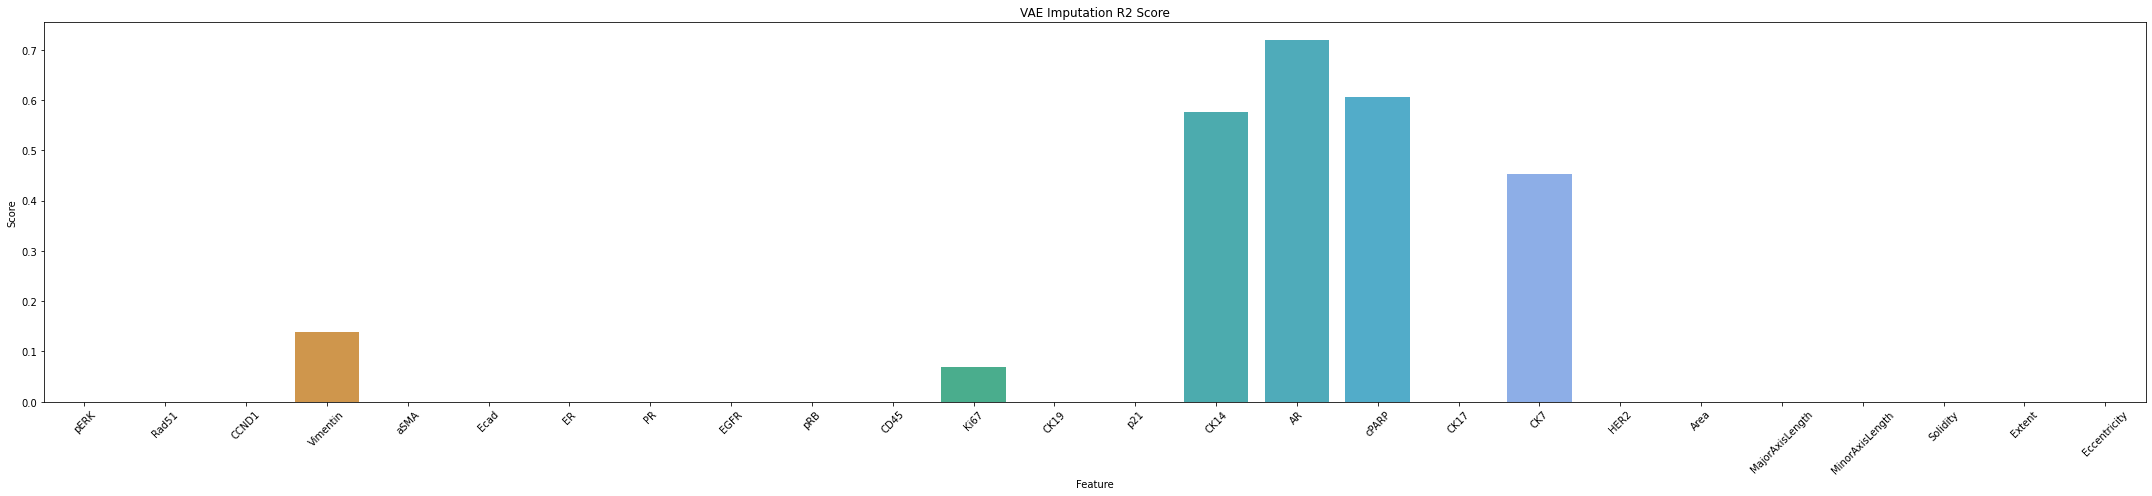

In [16]:
 fig = plt.figure()
sns.barplot(x="Feature", y="Score", data=r2_scores)
for ax in fig.axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
fig.set_size_inches(30,7)
plt.title("VAE Imputation R2 Score") 
plt.tight_layout()
plt.savefig(f'data/{case_to_evaluate}/elastic_net/{percentage}/combined_r2_scores.png', dpi=fig.dpi,bbox_inches='tight',facecolor='w')
# plt.show()

